<a href="https://colab.research.google.com/github/hewansirak/GeoParse-Dataset/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse

In [2]:
! pip install openai numpy pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import GEOparse

In [4]:
gse= GEOparse.get_GEO(geo="GSE12277", destdir="./data/GEO")


01-Apr-2025 10:16:25 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz to ./data/GEO/GSE12277_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz to ./data/GEO/GSE12277_family.soft.gz
100%|██████████| 19.8M/19.8M [00:00<00:00, 27.2MB/s]
01-Apr-2025 10:16:26 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
01-Apr-2025 10:16:26 DEBUG downloader - Moving /tmp/tmpzj4v891o to /content/data/GEO/GSE12277_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpzj4v891o to /content/data/GEO/GSE12277_family.soft.gz
01-Apr-2025 10:16:27 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE12nnn/GSE12277/soft/GSE12277_family.soft.gz
01-Apr-2025 10:16:27 INFO GEOparse - Parsing ./data/GEO/GSE

In [5]:
gsm= gse.gsms["GSM308246"]
data= gsm.table
data.head(-5)

,ID_REF,VALUE,ABS_CALL,DETECTION P-VALUE
0,AFFX-BioB-5_at,115.457000,P,0.000581
1,AFFX-BioB-M_at,119.770000,P,0.000044
2,AFFX-BioB-3_at,84.816300,P,0.000095
3,AFFX-BioC-5_at,296.351000,P,0.000052
4,AFFX-BioC-3_at,470.652000,P,0.000044
...,...,...,...,...
54665,1570631_at,12.766800,P,0.023926
54666,1570632_at,1.179860,A,0.780518
54667,1570633_at,0.159784,A,0.953857
54668,1570635_at,1.926470,A,0.753906


In [6]:
print("Metadata:")
for key, value in gse.metadata.items():
    print(f"{key}: {value}")


Metadata:
title: ['Hematopoietic Progenitor Cells of Different Donor Age']
geo_accession: ['GSE12277']
status: ['Public on Jun 12 2009']
submission_date: ['Jul 29 2008']
last_update_date: ['Mar 25 2019']
pubmed_id: ['19513108']
summary: ['In this series we have analyzed the effect of donor age on the gene expression profile of human hematopoietic stem and progenitor cells (HPC). Cells were taken from umbilical cord blood (CB) or from G-CSF mobilized blood of healthy donors for allogeneic blood stem cell transplantation.']
overall_design: ['Hematopoietic progenitor cells (HPC) were isolated within the CD34+ cell fraction from fresh human cord blood (CB) or from G-CSF mobilized peripheral blood (PB) as described in detail before (Wagner et al., Blood, 2004, 104:675-684; Wagner et al., Stem cells, 2005, 23:1180-1191; Wagner et al., 2007, 10:2638-2657). Differential gene expression was subsequently compared in the CD34+ samples of different donor age.']
type: ['Expression profiling by arra

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_REF             54675 non-null  object 
 1   VALUE              54675 non-null  float64
 2   ABS_CALL           54675 non-null  object 
 3   DETECTION P-VALUE  54675 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB
None


In [8]:
print(data.isnull().sum())

ID_REF               0
VALUE                0
ABS_CALL             0
DETECTION P-VALUE    0
dtype: int64


We don't have any null value here so we don't drop any row/col

In [9]:
print(data.describe())

              VALUE  DETECTION P-VALUE
count  54675.000000       5.467500e+04
mean      79.754650       2.703439e-01
std      354.728380       3.129571e-01
min        0.020512       2.606800e-13
25%        3.488335       2.929690e-03
50%       11.701000       1.115720e-01
75%       45.057650       5.000000e-01
max     7157.120000       9.997560e-01


In [10]:
print(data['ABS_CALL'].value_counts())

ABS_CALL
A    30772
P    22206
M     1697
Name: count, dtype: int64


This shows us that our categorical value called 'ABS_CALL' has three catergories with it's respective count

Text(0.5, 1.0, 'ABS_CALL category count')

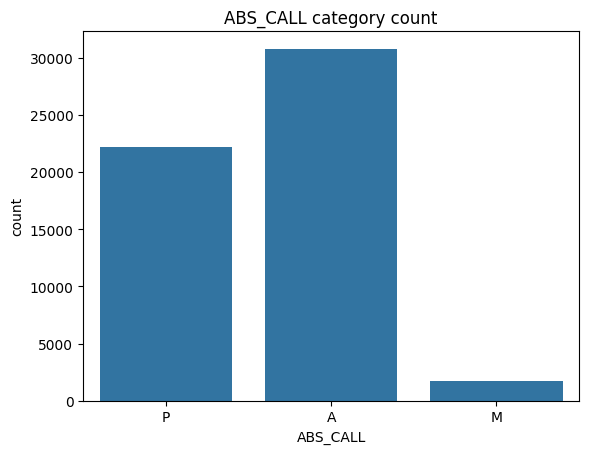

In [11]:
sns.countplot(x="ABS_CALL", data=data)
plt.title("ABS_CALL category count")

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
data['VALUE'] = scaler.fit_transform(data[['VALUE']])

In [14]:
data['ABS_CALL'] = data['ABS_CALL'].map({'P': 1, 'A': 0, 'M': 0.5})

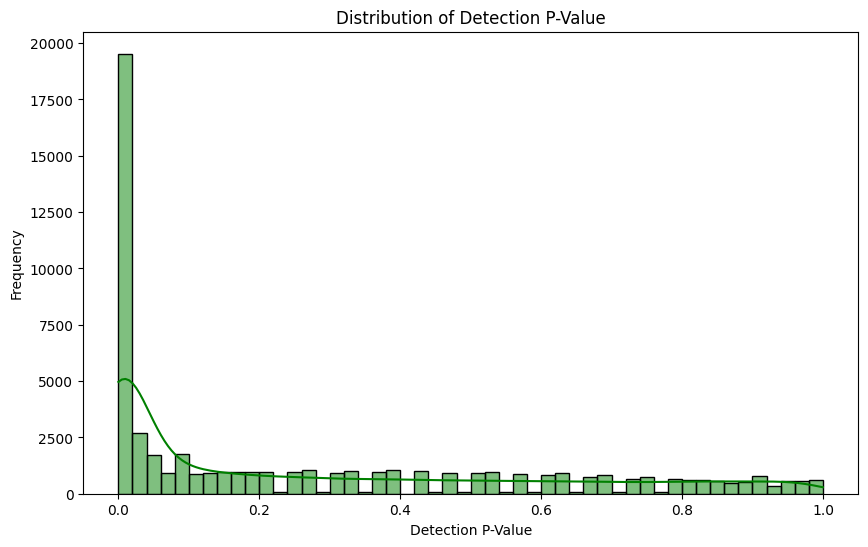

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DETECTION P-VALUE'], bins=50, kde=True, color='green')
plt.title("Distribution of Detection P-Value")
plt.xlabel("Detection P-Value")
plt.ylabel("Frequency")
plt.show()


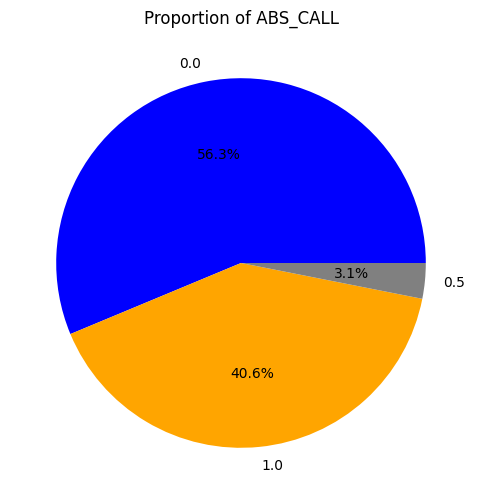

In [16]:
plt.figure(figsize=(8, 6))
data['ABS_CALL'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'gray'])
plt.title("Proportion of ABS_CALL")
plt.ylabel("")
plt.show()


In [17]:
top_probes = data.sort_values('VALUE', ascending=False).head(10)
print(top_probes)


                ID_REF     VALUE  ABS_CALL  DETECTION P-VALUE
846        201257_x_at  1.000000       1.0       2.441410e-04
8251       208695_s_at  0.995061       1.0       2.441410e-04
352        200763_s_at  0.967207       1.0       2.441410e-04
515          200926_at  0.956246       1.0       2.441410e-04
11486      212039_x_at  0.953624       1.0       2.441410e-04
13443      214003_x_at  0.948420       1.0       2.441410e-04
26000      226131_s_at  0.937582       1.0       2.441410e-04
306        200717_x_at  0.937525       1.0       2.441410e-04
61     AFFX-hum_alu_at  0.936829       1.0       2.606800e-13
806        201217_x_at  0.934194       1.0       2.441410e-04


In [20]:
from openai import OpenAI
import google.generativeai as genai
import json
from google.colab import userdata

In [21]:
sample_data = data.head(10).to_dict(orient='records')

In [22]:
sample_data_str = json.dumps(sample_data)

**NB** - Get a sample Groq Api key from here - https://console.groq.com/keys or make sure to give it access on the collab keys

In [23]:
client = OpenAI(
  base_url="https://api.groq.com/openai/v1",
  api_key=userdata.get("GROQ_API_KEY")
)

In [27]:
abstract = f"""
Title	HPC-PB_donorAF9-35yrs
Sample type	RNA

Source name	Hematopoietic progenitor cells (HPC), mobilized peripheral blood of healthy donors (PB, 35 years old).
Organism	Homo sapiens
Characteristics	Hematopoietic progenitor cells (HPC) were enriched within the CD34+ cell fraction (selection by magnetic beads and subsequent flow cytometric separation)
  from G-CSF mobilized blood from healthy donors for allogeneic blood stem cell transplantation.
Donor was 35 years old
Biomaterial provider	University of Heidelberg
Treatment protocol	HPC were collected from fresh umbilical cord blood (CB) or mobilized peripheral blood (PB) after written consent using guidelines approved by the
  Ethic Committee on the Use of Human Subjects at the University of Heidelberg. Mononuclear cells were isolated after centrifugation on Ficoll-hypaque (Biochrom KG, Berlin, Germany).
  CD34+ cells were enriched with a monoclonal anti-CD34 antibody labeled using magnetic beads on an affinity column (Miltenyi Biotec, Bergisch-Gladbach, Germany).
  After additional staining with anti-CD34-APC (Becton Dickinson, San Jose, CA, [BD]) further purification was achieved using the FACS-Vantage-SE flow cytometry system.
  Staining with propidium iodide (PI) was performed to allow exclusion of non-viable cells. Reanalysis revealed purity higher than 95%.
Growth protocol	Cells were isolated from fresh blood and immediately harvested for subsequent analysis.
Extracted molecule	total RNA
Extraction protocol	Total RNA was isolated using TRIzol reagent (Invitrogen, Paisley, Scotland) according to the manufacturer´s instructions.
  RNA quality was controlled using the RNA 6000 Pico LabChip kit (Agilent, Waldbronn, Germany) and quantified with a NanoDrop ND-1000 Spectrophotometer (Nanodrop Technologies, Wilmington, DE, USA).
Label	Biotin
Label protocol	100 ng total RNA was amplified with GeneChip two-cycle cDNA synthesis kit (Affymetrix, High Wycombe, United Kingdom) according to the manufacturers instructions. Quality of amplified RNA was controlled by LabChip technology.

Hybridization protocol	GeneChip Human Genome U133_Plus_2.0 (Affymetrix) were hybridized with 10 µg amplified RNA and washed with a fluidics station 450 (Affymetrix).
Scan protocol	GeneChip Human Genome U133_Plus_2.0 (Affymetrix) were scanned with GeneChip scanner 3000 (Affymetrix)
"""

In [28]:
prompt = f""" You are an expert Data Analyst, I have a dataset stored in
```{sample_data_str}```
 that I need to analyze. Please examine the first few rows of this data as well as
 the ```{abstract}```
and do the below step by step:

1. Generate comprehensive descriptions for each column that explain:
   - The data type
   - The likely purpose/meaning of the column
   - Potential values or ranges
   - Any patterns or notable characteristics

2. Format your response as a clean JSON object with ``` where:
   - Each key is the exact column name
   - Each value is a detailed description of that column
   - Include a "data_type" field for each column

3. For example:
{{
  "column_name": {{
    "description": "Detailed explanation of what this column represents",
    "data_type": "The data type (integer, string, date, etc.)",
    "possible_values": "Description of the range or categorical values",
    "notes": "Any additional observations about the data"
  }}
}}
Be definite in your answer!
Provide in JSON format only!!!
First find relevant information from the abstract then answer the question based
on the relevant information.
"""
response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "system", "content": "You are an expert data analyst."},
        {"role": "user", "content": prompt}
    ]
)
print(response.choices[0].message.content)

```json
{
  "ID_REF": {
    "description": "Reference identifier for the microarray probe set",
    "data_type": "string",
    "possible_values": "Unique strings (e.g., AFFX-BioB-5_at) representing different probe sets",
    "notes": "These identifiers are likely used to map the expression data to specific genes or probe sets on the microarray"
  },
  "VALUE": {
    "description": "Expression value for the corresponding probe set",
    "data_type": "float",
    "possible_values": "Continuous values ranging from approximately 0 to 1, representing the intensity of gene expression",
    "notes": "These values are likely the result of signal processing and normalization of the microarray data"
  },
  "ABS_CALL": {
    "description": "Absolute call for the probe set, indicating whether the gene is expressed or not",
    "data_type": "float",
    "possible_values": "Binary values (0 or 1) indicating whether the gene is detected (1) or not detected (0)",
    "notes": "In this dataset, all ABS

Task 2 - Convert the metadata to first order logic using the LLM

Example: Transformed Predicates:
- SampleType(CardiacVentricleTotalRNA)
- SourceInformation(Mice, CardiacVentricle)
- KitUsed(QiagenRNeasyKit)
- Manufacturer(Qiagen, RNeasyKit)
- ReagentUsed(Trizol)
- Manufacturer(Invitrogen, Trizol)
- KitUsed(QiagenDNeasyKit)
-Manufacturer(Qiagen, DNeasyKit)
- DeviceUsed(AffymetrixGeneChipMOE4302.0)
- Manufacturer(Affymetrix, GeneChipMOE4302.0)


In [40]:
metadt = gse.metadata.items()


In [41]:
metadt

dict_items([('title', ['Hematopoietic Progenitor Cells of Different Donor Age']), ('geo_accession', ['GSE12277']), ('status', ['Public on Jun 12 2009']), ('submission_date', ['Jul 29 2008']), ('last_update_date', ['Mar 25 2019']), ('pubmed_id', ['19513108']), ('summary', ['In this series we have analyzed the effect of donor age on the gene expression profile of human hematopoietic stem and progenitor cells (HPC). Cells were taken from umbilical cord blood (CB) or from G-CSF mobilized blood of healthy donors for allogeneic blood stem cell transplantation.']), ('overall_design', ['Hematopoietic progenitor cells (HPC) were isolated within the CD34+ cell fraction from fresh human cord blood (CB) or from G-CSF mobilized peripheral blood (PB) as described in detail before (Wagner et al., Blood, 2004, 104:675-684; Wagner et al., Stem cells, 2005, 23:1180-1191; Wagner et al., 2007, 10:2638-2657). Differential gene expression was subsequently compared in the CD34+ samples of different donor age

In [44]:
prompt = f""" You are an expert in formal logic and knowledge representation. Convert the following abstract into First-Order Logic by defining:

1. Predicates that represent key concepts.
2. Constants for specific values where applicable.

Ensure that:
- The predicates accurately capture the meaning of the abstract.
- Relationships in-between are well-structured.
- Constraints such as are explicitly encoded.
- The output follows the structure below:

Example Output Format: Transformed Predicates of the abstract
Transformed Predicates:
SampleType(HPC_PB_donorAF9_35yrs, RNA)
SourceInformation(HPC_PB_donorAF9_35yrs, HematopoieticProgenitorCells)
SourceInformation(HPC_PB_donorAF9_35yrs, MobilizedPeripheralBlood)
SourceInformation(HPC_PB_donorAF9_35yrs, HealthyDonor)
Organism(HPC_PB_donorAF9_35yrs, HomoSapiens)
Age(HPC_PB_donorAF9_35yrs, 35)
BiomaterialProvider(HPC_PB_donorAF9_35yrs, UniversityOfHeidelberg)
DonorType(HPC_PB_donorAF9_35yrs, AllogeneicBloodStemCellDonor)
CellType(HPC_PB_donorAF9_35yrs, CD34PositiveCells)
EnrichmentMethod(HPC_PB_donorAF9_35yrs, MagneticBeads)
EnrichmentMethod(HPC_PB_donorAF9_35yrs, FlowCytometricSeparation)
IsolationMethod(HPC_PB_donorAF9_35yrs, FicollHypaqueCentrifugation)
IsolationMethod(HPC_PB_donorAF9_35yrs, MonoclonalAntiCD34Antibody)
KitUsed(HPC_PB_donorAF9_35yrs, MiltenyiBiotecAffinityColumn)
KitUsed(HPC_PB_donorAF9_35yrs, FACS_Vantage_SE)
ReagentUsed(HPC_PB_donorAF9_35yrs, PropidiumIodide)
StainingMethod(HPC_PB_donorAF9_35yrs, AntiCD34_APC)
DeviceUsed(HPC_PB_donorAF9_35yrs, AgilentRNA6000PicoLabChip)
DeviceUsed(HPC_PB_donorAF9_35yrs, NanoDropND_1000Spectrophotometer)
DeviceUsed(HPC_PB_donorAF9_35yrs, GeneChipScanner3000)
Manufacturer(MiltenyiBiotec, AffinityColumn)
Manufacturer(BiochromKG, FicollHypaque)
Manufacturer(BectonDickinson, AntiCD34_APC)
Manufacturer(Affymetrix, GeneChipHumanGenomeU133_Plus_2_0)
Manufacturer(Invitrogen, TrizolReagent)
Manufacturer(Agilent, RNA6000PicoLabChipKit)
Manufacturer(NanodropTechnologies, NanoDropND_1000Spectrophotometer)
ExtractionMethod(HPC_PB_donorAF9_35yrs, TrizolReagentExtraction)
ExtractedMolecule(HPC_PB_donorAF9_35yrs, TotalRNA)
LabelingMethod(HPC_PB_donorAF9_35yrs, BiotinLabeling)
LabelingMethod(HPC_PB_donorAF9_35yrs, GeneChipTwoCycleCDNASynthesisKit)
HybridizationMethod(HPC_PB_donorAF9_35yrs, GeneChipHumanGenomeU133_Plus_2_0Hybridization)
ScanMethod(HPC_PB_donorAF9_35yrs, GeneChipScanner3000Scan)


- Here is the metadata: ```{metadt}```

Provide only the First-Order Logic representation no explanation!!!
"""

response = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "system", "content": "You are an expert in formal logic and knowledge representation."},
        {"role": "user", "content": prompt}
    ]
)
print(response.choices[0].message.content)

Transformed Predicates:
StudyTitle(GSE12277, "Hematopoietic Progenitor Cells of Different Donor Age")
GEOAccession(GSE12277, GSE12277)
Status(GSE12277, Public)
SubmissionDate(GSE12277, "Jul 29 2008")
LastUpdateDate(GSE12277, "Mar 25 2019")
PubMedID(GSE12277, "19513108")
Summary(GSE12277, "In this series we have analyzed the effect of donor age on the gene expression profile of human hematopoietic stem and progenitor cells (HPC).")
Design(GSE12277, "Hematopoietic progenitor cells (HPC) were isolated within the CD34+ cell fraction from fresh human cord blood (CB) or from G-CSF mobilized peripheral blood (PB)")
StudyType(GSE12277, "Expression profiling by array")
Contributor(GSE12277, "Wolfgang Wagner")
Contributor(GSE12277, "Simone Bork")
Contributor(GSE12277, "Patrick Horn")
Contributor(GSE12277, "Anthony D Ho")
SampleID(GSE12277, GSM308237)
SampleID(GSE12277, GSM308239)
SampleID(GSE12277, GSM308241)
SampleID(GSE12277, GSM308242)
SampleID(GSE12277, GSM308244)
SampleID(GSE12277, GSM30824